## Imports

In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import scipy.io as sio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Load First Dataset

In [2]:
genres = pd.read_csv('music.csv')

In [3]:
print(list(genres.columns))

['filename', 'tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


- filename = Filename as given in marsyas dataset.
- tempo = The speed at which a passage of music is played
- beats = Rythmic unit in music
- chroma_stft = Short Time Fourier Transform
- rmse = Root Mean Square Error
- spectral_centroid = Indicates where the "center of mass" of the spectrum is located.
- spectral_bandwidth = the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value
- rolloff = Roll-off is the steepness of a transmission function with frequency
- zero_crossing_rate = The rate at which the signal changes from positive to negative or back
- mfcc1 to mfcc20 = Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.
- label = Contains a string depicting the genre, pop = 1, classical = 2

In [4]:
genres = genres[['label',
                 'tempo', 
                 'beats', 
                 'chroma_stft',
                 'spectral_centroid', 
                 'spectral_bandwidth', 
                 'rolloff', 
                 'zero_crossing_rate']]

In [5]:
genres['label'] = genres['label'].map({1: 1, 2: -1})

Now pop is labeled as 1 and classical is labeled as -1.

In [6]:
X = genres[['tempo', 
            'beats', 
            'chroma_stft',
            'spectral_centroid', 
            'spectral_bandwidth', 
            'rolloff', 
            'zero_crossing_rate']].to_numpy()

X.shape

# There are 200 data points, each with 7 features.

(200, 7)

In [7]:
Y = genres[['label']].to_numpy()

Y.shape

# There is one target value, either 1 and -1.

(200, 1)

In [8]:
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])  

X_shuffled = X_and_Y[:,[0,1,2,3,4,5,6]]
Y_shuffled = X_and_Y[:,7]

print(X_shuffled[0])  
print(Y_shuffled[0])

(200, 7)
(200, 1)
[9.93840144e+01 4.70000000e+01 4.37182941e-01 3.40102278e+03
 3.07029276e+03 7.05224902e+03 1.65738227e-01 1.00000000e+00]
[9.93840144e+01 4.70000000e+01 4.37182941e-01 3.40102278e+03
 3.07029276e+03 7.05224902e+03 1.65738227e-01]
1.0


### Functions for SVM with RBF Using Scikit-Learn 

In [9]:
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e


# Draw the heatmap of training errors.
def draw_SVM_heatmap(training_errors, gamma_list, C_list):
    # training_errors: A NumPy array with the shape (len(C_list), len(gamma_list))
    # gamma_list: List of gamma(s).
    # C_list: List of C(s).
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Training error w.r.t $C$ and $\gamma$')
    plt.show()

### Functions for k-NN Using Scikit-Learn 

In [10]:
# Draw heatmaps for result of grid search.
def draw_GS_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='k')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

### Functions for Decision Tree Using Scikit-Learn

In [11]:
# Draw heatmaps for result of grid search.
def draw_DT_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

## 80/20

In [12]:
X_train = X_shuffled[:160] # Shape: (160,7)
Y_train = Y_shuffled[:160] # Shape: (160,)
X_test = X_shuffled[-40:]  # Shape: (40,7)
Y_test = Y_shuffled[-40:]  # Shape: (40,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 7)
(160,)
(40, 7)
(40,)


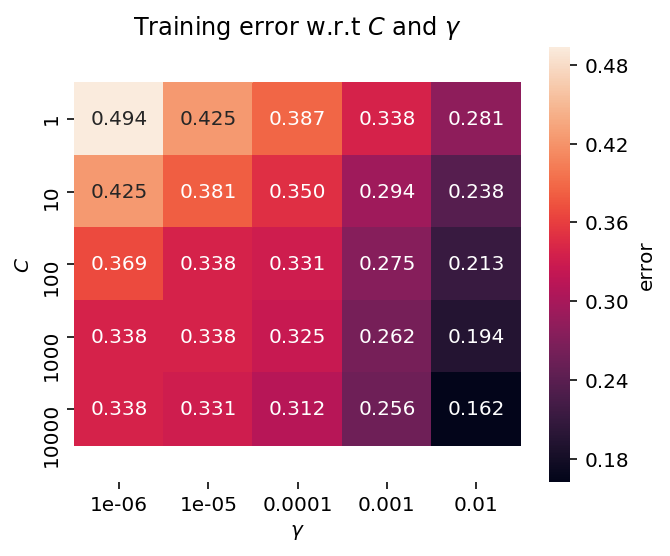

Best parameter C*=10000, best parameter gamma*=0.01
Test error: 0.32499999999999996


In [13]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

# An example of using draw_heatmap().
#    errors = np.random.random((len(C_list), len(gamma_list)))
#    draw_heatmap(errors, gamma_list, C_list)

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train[:,[0,1]], Y_train) # selecting tempo and beat

        # Show decision boundary, training error and test error.
        # selecting tempo and beat
        e_training = calc_error(X_train[:,[0,1]], Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma
            
draw_SVM_heatmap(training_errors, gamma_list, C_list)

# Obtain the weights and bias from the best linear SVM classifier .
# selecting tempo and beat
print('Best parameter C*={}, best parameter gamma*={}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test[:,[0,1]], Y_test, classifier))) 

C:\Users\derek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


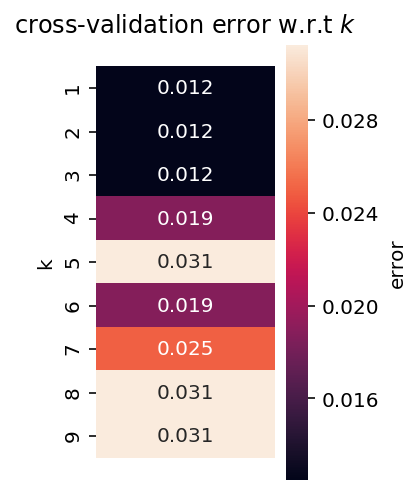

Best number of nearest neighbors (k): 1
Test error: 0.025000000000000022


In [14]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_GS_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

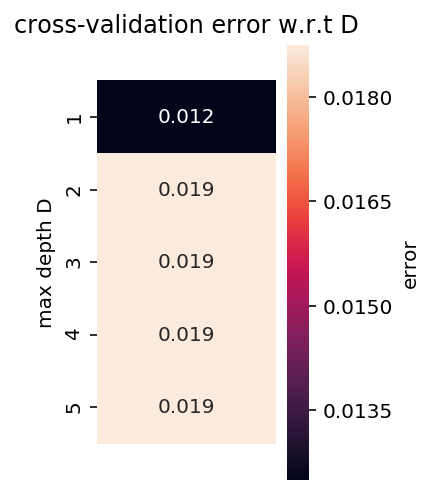

Best max depth D: {'max_depth': 1}
Test error: 0.025000000000000022


In [15]:
# Perform grid search for best max depth.

# 1. Create a decision tree classifier.
estimator = tree.DecisionTreeClassifier(criterion="entropy",random_state=1)

# 2. Create a grid searcher with cross-validation.
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator, param_grid, cv=10)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train,Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(5,1)
draw_DT_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth.
best_max_depth = grid_search.best_params_
print("Best max depth D: {}".format(best_max_depth))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

## 20/80

In [16]:
X_train = X_shuffled[:40] # Shape: (40,2)
Y_train = Y_shuffled[:40]          # Shape: (40,)
X_test = X_shuffled[-160:]  # Shape: (160,2)
Y_test = Y_shuffled[-160:]           # Shape: (160,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(40, 7)
(40,)
(160, 7)
(160,)


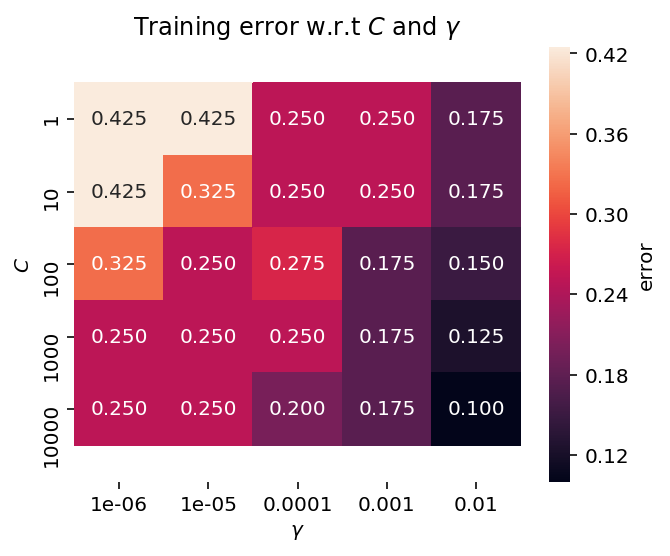

Best parameter C*=10000, best parameter gamma*=0.01
Test error: 0.54375


In [17]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

# An example of using draw_heatmap().
#    errors = np.random.random((len(C_list), len(gamma_list)))
#    draw_heatmap(errors, gamma_list, C_list)

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train[:,[0,1]], Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train[:,[0,1]], Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma
            
draw_SVM_heatmap(training_errors, gamma_list, C_list)

# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C*={}, best parameter gamma*={}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test[:,[0,1]], Y_test, classifier)))

C:\Users\derek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


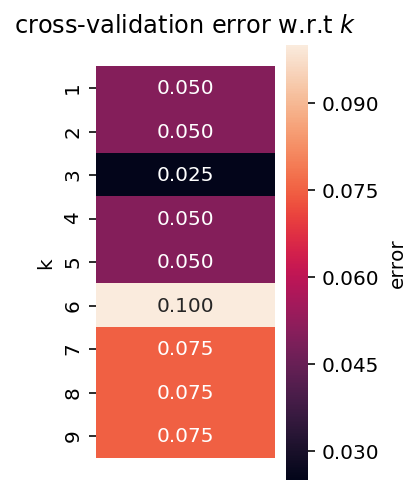

Best number of nearest neighbors (k): 3
Test error: 0.03749999999999998


In [18]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_GS_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))


# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

C:\Users\derek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


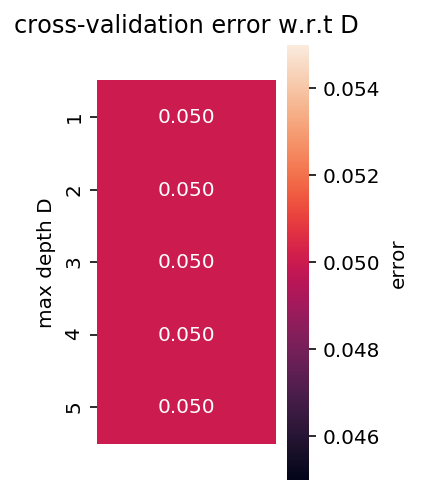

Best max depth D: {'max_depth': 1}
Test error: 0.012499999999999956


In [19]:
# Perform grid search for best max depth.

# 1. Create a decision tree classifier.
estimator = tree.DecisionTreeClassifier(criterion="entropy",random_state=1)

# 2. Create a grid searcher with cross-validation.
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator, param_grid, cv=10)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train,Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(5,1)
draw_DT_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth.
best_max_depth = grid_search.best_params_
print("Best max depth D: {}".format(best_max_depth))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

# Load Second Dataset

In [20]:
lol = pd.read_csv('games.csv')

In [21]:
print(list(lol.columns))

['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']


"This is a collection of over 50,000 ranked EUW games from the game League of Legends, as well as json files containing a way to convert between champion and summoner spell IDs and their names. For each game, there are fields for:

- Game ID
- Creation Time (in Epoch format)
- Game Duration (in seconds)
- Season ID
- Winner (1 = team1, 2 = team2)
- First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none)
- Champions and summoner spells for each team (Stored as Riot's champion and summoner spell IDs)
- The number of tower, inhibitor, Baron, dragon and Rift Herald kills each team has
- The 5 bans of each team (Again, champion IDs are used)"

We will drop the game ID, creation time, season ID, champions, summoner spells, and bans, as they either are irrelevant to the winner or introduces too much complexity in the need to one-hot encode. Winner and first "objective" taken will be relabeled as 1 = team1, -1 = team2, and 0 for neither. 

In [22]:
lol = lol[['gameDuration', 'winner', 
           'firstBlood', 'firstTower', 
           'firstInhibitor', 'firstBaron', 
           'firstDragon', 'firstRiftHerald', 
           't1_towerKills', 't1_inhibitorKills', 
           't1_baronKills', 't1_dragonKills', 
           't1_riftHeraldKills', 't2_towerKills', 
           't2_inhibitorKills', 't2_baronKills', 
           't2_dragonKills', 't2_riftHeraldKills']]

In [23]:
lol.head()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1949,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1851,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1493,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1758,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,2094,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0


In [24]:
lol['winner'] = lol['winner'].map({1: 1, 2: -1})
lol['firstBlood'] = lol['firstBlood'].map({0: 0, 1: 1, 2: -1})
lol['firstInhibitor'] = lol['firstInhibitor'].map({0: 0, 1: 1, 2: -1})
lol['firstBaron'] = lol['firstBaron'].map({0: 0, 1: 1, 2: -1})
lol['firstDragon'] = lol['firstDragon'].map({0: 0, 1: 1, 2: -1})
lol['firstRiftHerald'] = lol['firstRiftHerald'].map({0: 0, 1: 1, 2: -1})

In [25]:
X = lol[['gameDuration', 
         'firstBlood', 'firstTower', 
         'firstInhibitor', 'firstBaron', 
         'firstDragon', 'firstRiftHerald', 
         't1_towerKills', 't1_inhibitorKills', 
         't1_baronKills', 't1_dragonKills', 
         't1_riftHeraldKills', 't2_towerKills', 
         't2_inhibitorKills', 't2_baronKills', 
         't2_dragonKills', 't2_riftHeraldKills']].to_numpy()

Y = lol[['winner']].to_numpy()

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape) # (51490, 17)
print(Y.shape) # (51490, 1)
print(X_and_Y[0])  

X_shuffled = X_and_Y[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
Y_shuffled = X_and_Y[:,17]

print(X_shuffled[0])  
print(Y_shuffled[0])

(51490, 17)
(51490, 1)
[1886    1    1   -1    1   -1    1    3    0    1    0    1   10    2
    0    3    0   -1]
[1886    1    1   -1    1   -1    1    3    0    1    0    1   10    2
    0    3    0]
-1


## 80/20

In [26]:
X_train = X_shuffled[:41192] # Shape: (41192,17)
Y_train = Y_shuffled[:41192] # Shape: (41192,)
X_test = X_shuffled[-10298:] # Shape: (10298,17)
Y_test = Y_shuffled[-10298:] # Shape: (10298,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(41192, 17)
(41192,)
(10298, 17)
(10298,)


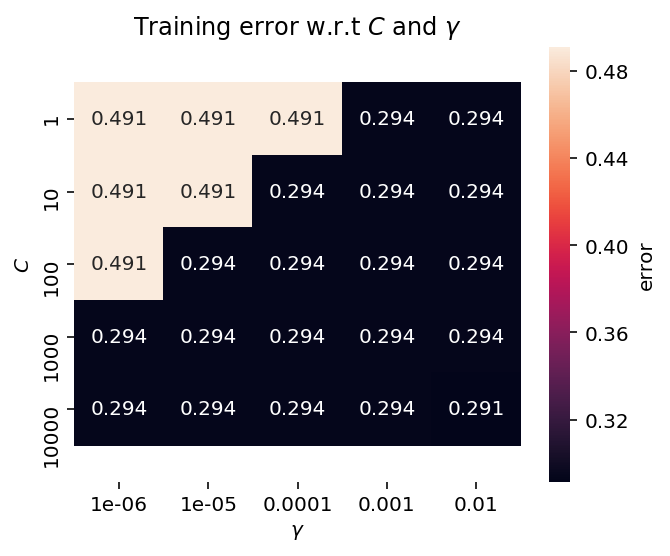

Best parameter C*=10000, best parameter gamma*=0.01
Test error: 0.29700000000000004


In [27]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

# An example of using draw_heatmap().
#    errors = np.random.random((len(C_list), len(gamma_list)))
#    draw_heatmap(errors, gamma_list, C_list)

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train[:8000][:,[1,2]], Y_train[:8000]) # selecting firstBlood and firstTower
        # shorten to 8000/2000 to make runtime for this classification managable

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train[:,[1,2]][:8000], Y_train[:8000], classifier) 
        # selecting firstBlood and firstTower
        # shorten to 8000/2000 to make runtime for this classification managable
        
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma
            
draw_SVM_heatmap(training_errors, gamma_list, C_list)

# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C*={}, best parameter gamma*={}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test[:,[1,2]][-2000:], Y_test[-2000:], classifier))) 
# selecting firstBlood and firstTower
# shorten to 8000/2000 to make runtime for this classification managable

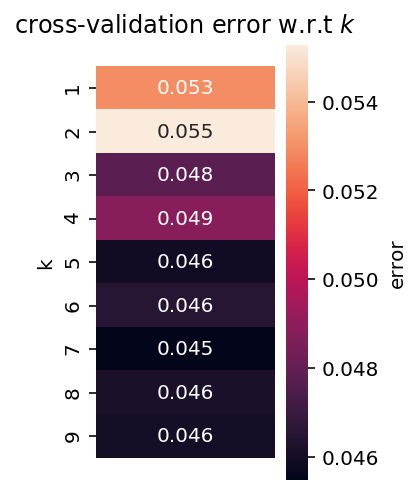

Best number of nearest neighbors (k): 7
Test error: 0.045639930083511415


In [28]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_GS_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

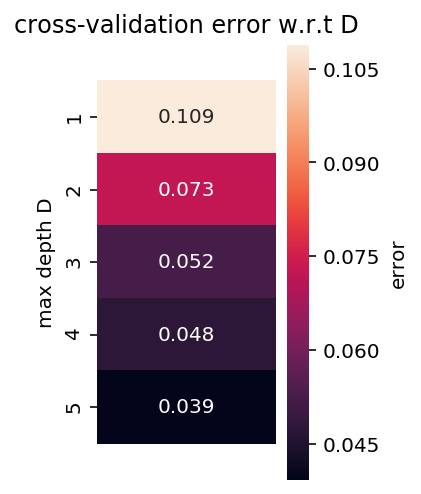

Best max depth D: {'max_depth': 5}
Test error: 0.04000776849873766


In [29]:
# Perform grid search for best max depth.

# 1. Create a decision tree classifier.
estimator = tree.DecisionTreeClassifier(criterion="entropy",random_state=1)

# 2. Create a grid searcher with cross-validation.
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator, param_grid, cv=10)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train,Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(5,1)
draw_DT_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth.
best_max_depth = grid_search.best_params_
print("Best max depth D: {}".format(best_max_depth))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

## 20/80

In [30]:
X_train = X_shuffled[:10298] # Shape: (10298,17)
Y_train = Y_shuffled[:10298] # Shape: (10298,)
X_test = X_shuffled[-41192:] # Shape: (41192,17)
Y_test = Y_shuffled[-41192:] # Shape: (41192,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10298, 17)
(10298,)
(41192, 17)
(41192,)


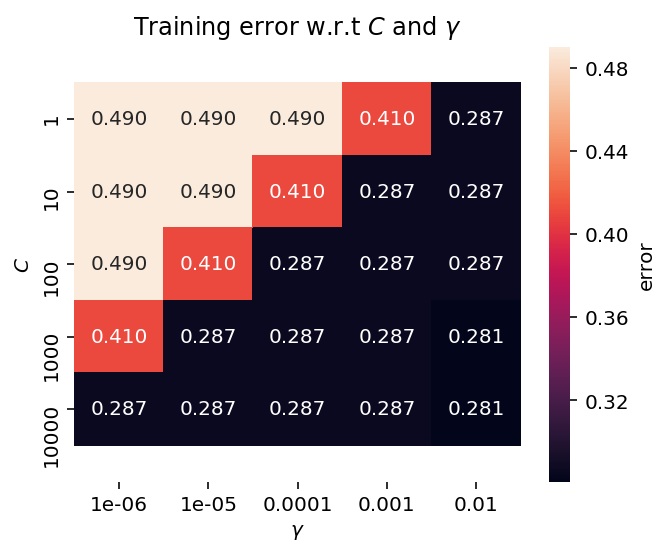

Best parameter C*=1000, best parameter gamma*=0.01
Test error: 0.30362500000000003


In [31]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

# An example of using draw_heatmap().
#    errors = np.random.random((len(C_list), len(gamma_list)))
#    draw_heatmap(errors, gamma_list, C_list)

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train[:2000][:,[1,2]], Y_train[:2000]) 
        # selecting firstBlood and firstTower
        # shorten to 8000/2000 to make runtime for this classification managable

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train[:2000][:,[1,2]], Y_train[:2000], classifier) 
        # selecting firstBlood and firstTower
        # shorten to 8000/2000 to make runtime for this classification managable
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma
            
draw_SVM_heatmap(training_errors, gamma_list, C_list)

# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C*={}, best parameter gamma*={}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test[:8000][:,[1,2]], Y_test[:8000], classifier))) 
# selecting firstBlood and firstTower
# shorten to 8000/2000 to make runtime for this classification managable

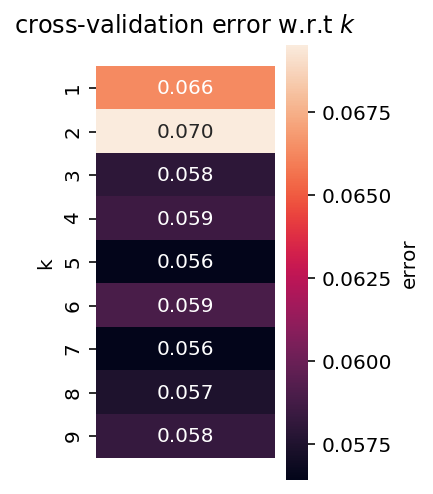

Best number of nearest neighbors (k): 5
Test error: 0.055034958244319254


In [32]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_GS_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

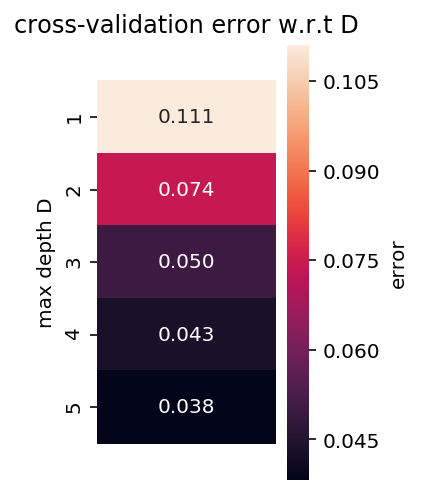

Best max depth D: {'max_depth': 5}
Test error: 0.03765294231889682


In [33]:
# Perform grid search for best max depth.

# 1. Create a decision tree classifier.
estimator = tree.DecisionTreeClassifier(criterion="entropy",random_state=1)

# 2. Create a grid searcher with cross-validation.
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator, param_grid, cv=10)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train,Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(5,1)
draw_DT_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth.
best_max_depth = grid_search.best_params_
print("Best max depth D: {}".format(best_max_depth))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

# Load Third Dataset 

In [34]:
avocado = pd.read_csv('avocado.csv')

In [35]:
print(list(avocado.columns))

['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']


- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [36]:
avocado = avocado[['Date', 'AveragePrice', 
               'Total Volume', '4046', 
               '4225', '4770', 
               'Total Bags', 'Small Bags', 
               'Large Bags', 'XLarge Bags', 
               'type', 'year']]

import time
import datetime
avocado['Date'] = avocado['Date'].map(lambda s: time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple()))
avocado['type'] = avocado['type'].map({"conventional": -1, "organic": 1})

avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.451203e+09,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,-1,2015
1,1.450598e+09,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,-1,2015
2,1.449994e+09,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,-1,2015
3,1.449389e+09,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,-1,2015
4,1.448784e+09,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,-1,2015


In [37]:
X = avocado[['Date', 'AveragePrice', 
             'Total Volume', '4046', 
             '4225', '4770', 
             'Total Bags', 'Small Bags', 
             'Large Bags', 'XLarge Bags', 
             'year']].to_numpy()

Y = avocado[['type']].to_numpy()

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape) # (18249, 11)
print(Y.shape) # (18249, 1)
print(X_and_Y[0])  

X_shuffled = X_and_Y[:,[0,1,2,3,4,5,6,7,8,9,10]]
Y_shuffled = X_and_Y[:,11]

print(X_shuffled[0])  
print(Y_shuffled[0])

(18249, 11)
(18249, 1)
[1.4687388e+09 2.1100000e+00 3.0480390e+04 1.9242400e+03 2.5560940e+04
 3.5130000e+01 2.9600800e+03 3.6333000e+02 2.5967500e+03 0.0000000e+00
 2.0160000e+03 1.0000000e+00]
[1.4687388e+09 2.1100000e+00 3.0480390e+04 1.9242400e+03 2.5560940e+04
 3.5130000e+01 2.9600800e+03 3.6333000e+02 2.5967500e+03 0.0000000e+00
 2.0160000e+03]
1.0


## 80/20

In [38]:
X_train = X_shuffled[:14599] # Shape: (14599,11)
Y_train = Y_shuffled[:14599] # Shape: (14599,)
X_test = X_shuffled[-3650:] # Shape: (3650,11)
Y_test = Y_shuffled[-3650:] # Shape: (3650,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(14599, 11)
(14599,)
(3650, 11)
(3650,)


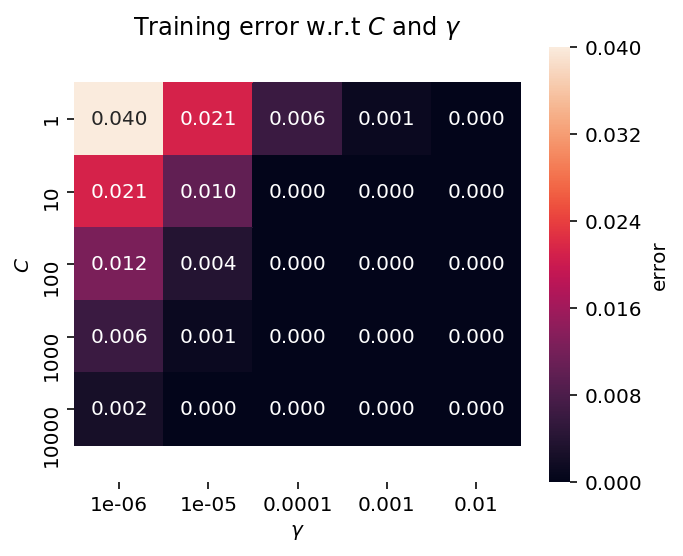

Best parameter C*=1, best parameter gamma*=0.01
Test error: 0.33999999999999997


In [39]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

# An example of using draw_heatmap().
#    errors = np.random.random((len(C_list), len(gamma_list)))
#    draw_heatmap(errors, gamma_list, C_list)

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train[:800][:,[1,2]], Y_train[:800]) 
        # selecting price and volume
        # shorten to 800/200 to make runtime for this classification managable

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train[:800][:,[1,2]], Y_train[:800], classifier) 
        # selecting price and volume
        # shorten to 800/200 to make runtime for this classification managable
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma
            
draw_SVM_heatmap(training_errors, gamma_list, C_list)

# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C*={}, best parameter gamma*={}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test[:200][:,[1,2]], Y_test[:200], classifier))) 
# selecting price and volume
# shorten to 800/200 to make runtime for this classification managable

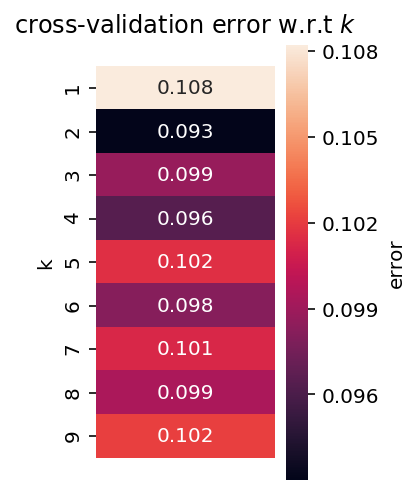

Best number of nearest neighbors (k): 2
Test error: 0.0956164383561644


In [40]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_GS_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

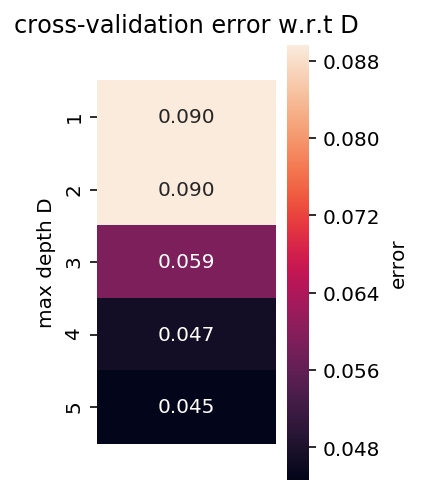

Best max depth D: {'max_depth': 5}
Test error: 0.0383561643835616


In [41]:
# Perform grid search for best max depth.

# 1. Create a decision tree classifier.
estimator = tree.DecisionTreeClassifier(criterion="entropy",random_state=1)

# 2. Create a grid searcher with cross-validation.
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator, param_grid, cv=10)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train,Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(5,1)
draw_DT_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth.
best_max_depth = grid_search.best_params_
print("Best max depth D: {}".format(best_max_depth))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

## 20/80

In [42]:
X_train = X_shuffled[:3650] # Shape: (3650,11)
Y_train = Y_shuffled[:3650] # Shape: (3650,)
X_test = X_shuffled[-14599:] # Shape: (14599,11)
Y_test = Y_shuffled[-14599:] # Shape: (14599,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3650, 11)
(3650,)
(14599, 11)
(14599,)


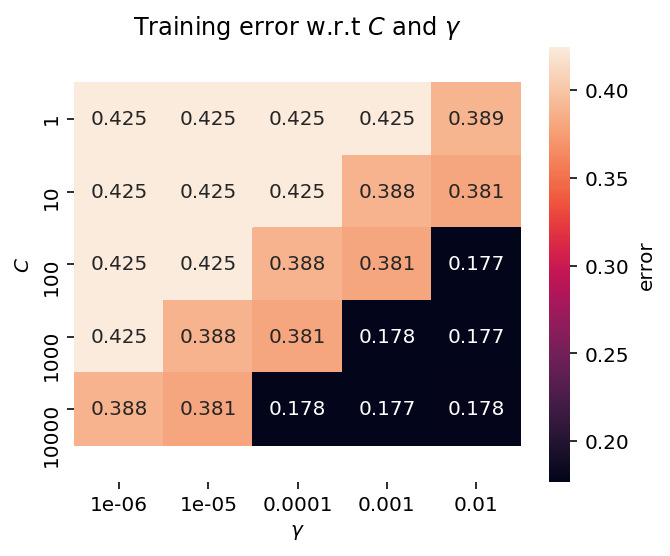

Best parameter C*=1000, best parameter gamma*=0.01
Test error: 0.18562915268169056


In [43]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

# An example of using draw_heatmap().
#    errors = np.random.random((len(C_list), len(gamma_list)))
#    draw_heatmap(errors, gamma_list, C_list)

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train[:,[0,1]], Y_train) 
        # selecting price and volume

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train[:,[0,1]], Y_train, classifier) 
        # selecting price and volume
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma
            
draw_SVM_heatmap(training_errors, gamma_list, C_list)

# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C*={}, best parameter gamma*={}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test[:,[0,1]], Y_test, classifier))) 
# selecting price and volume

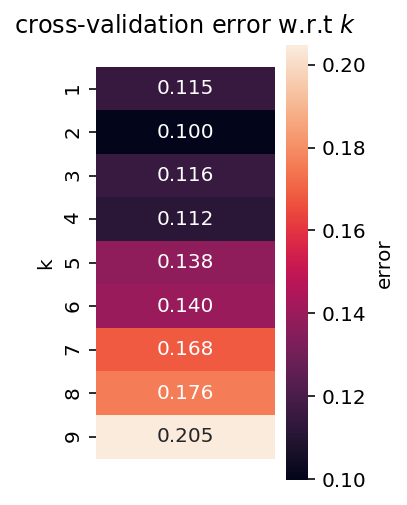

Best number of nearest neighbors (k): 2
Test error: 0.10260976779231457


In [44]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_GS_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))

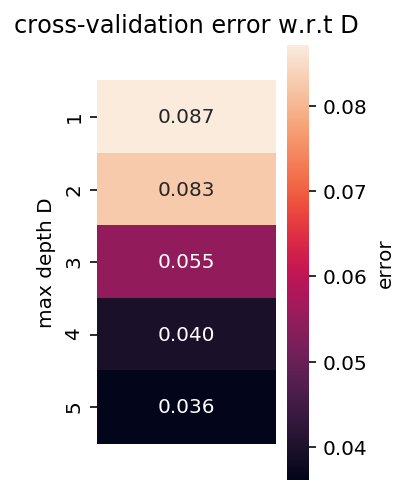

Best max depth D: {'max_depth': 5}
Test error: 0.03678334132474825


In [45]:
# Perform grid search for best max depth.

# 1. Create a decision tree classifier.
estimator = tree.DecisionTreeClassifier(criterion="entropy",random_state=1)

# 2. Create a grid searcher with cross-validation.
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator, param_grid, cv=10)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train,Y_train)

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(5,1)
draw_DT_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

# Show the best max depth.
best_max_depth = grid_search.best_params_
print("Best max depth D: {}".format(best_max_depth))

# Calculate the test error.
test_error = 1 - accuracy_score(grid_search.best_estimator_.predict(X_test),Y_test)
print("Test error: {}".format(test_error))